In [1]:
try:
    import ngspyce as ns
except ModuleNotFoundError as e:
    pass

from pathlib import Path
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import handlers
import importlib; importlib.reload(handlers)

/headless/.xschem/simulations/test-ota.spice
/headless/.xschem/simulations/test-ldo.spice
/headless/.xschem/simulations/gf180_test.spice
/headless/.xschem/simulations/test-ota.spice
/headless/.xschem/simulations/test-ldo.spice
/headless/.xschem/simulations/gf180_test.spice


<module 'handlers' from '/foss/designs/Xschem/handlers.py'>

##### WARNING

In [17]:
import shutil; shutil.rmtree(handlers.data_dir)

# LDO Analysis

### Previous Analysis



| a | b |
|--|--|
| Transient Analysis | 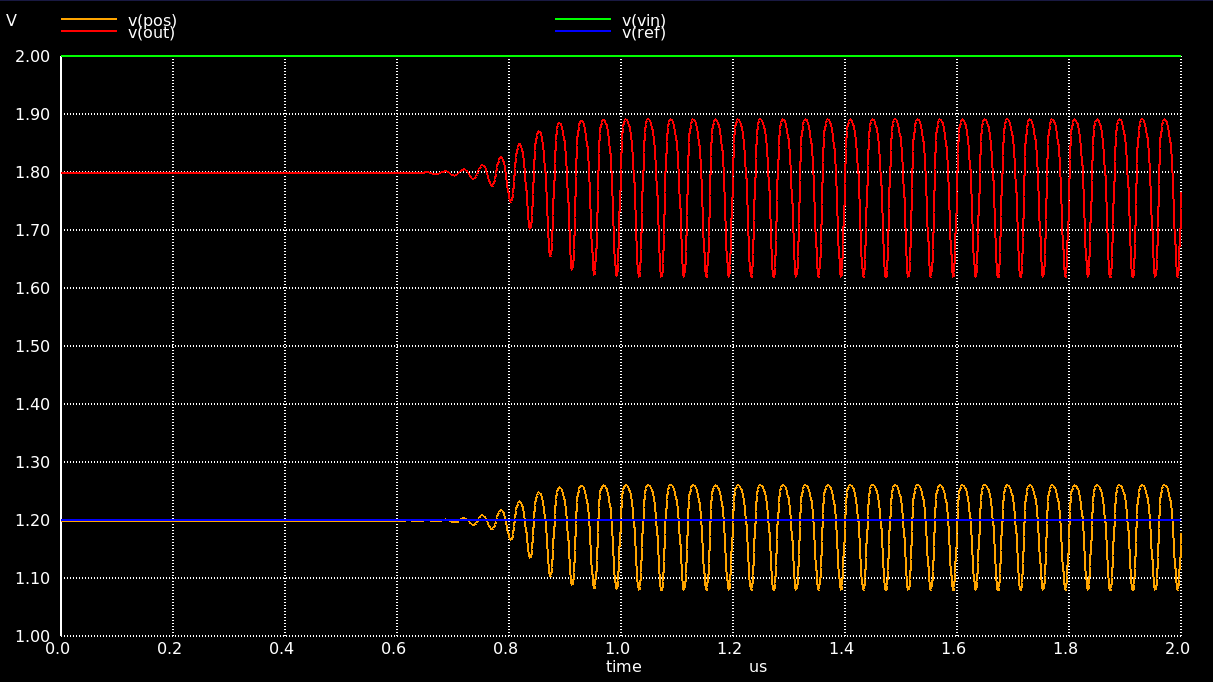 |
| Transient 24 us | 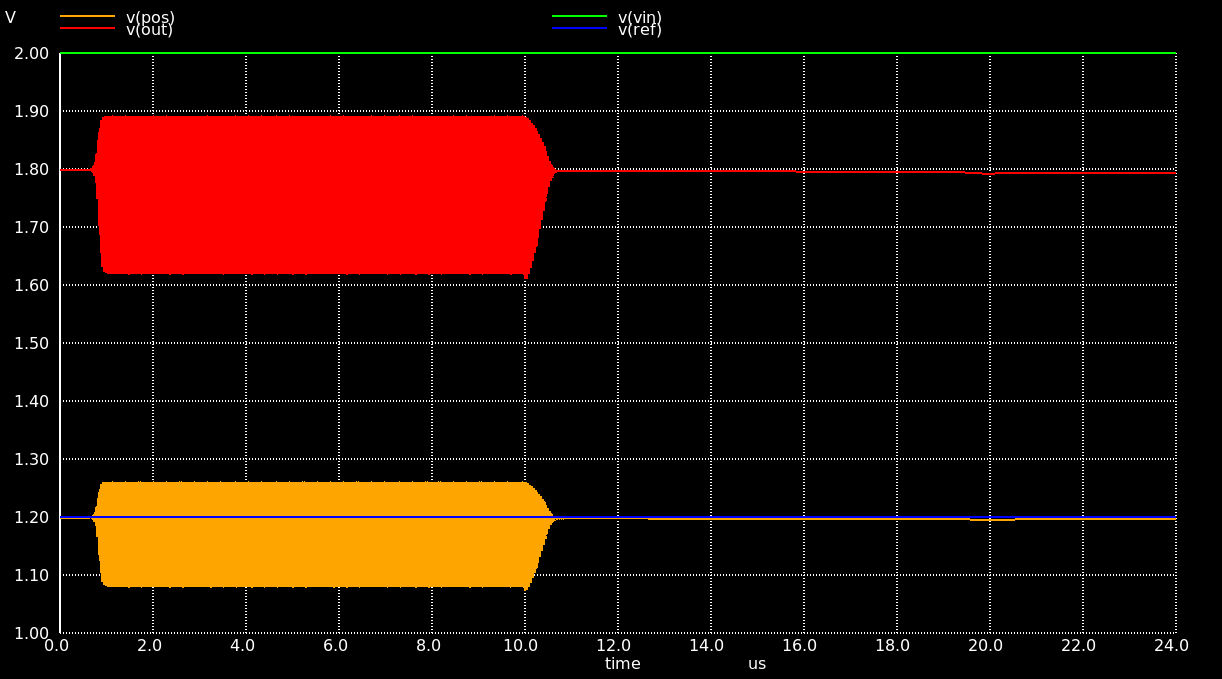 |
| PSRR | 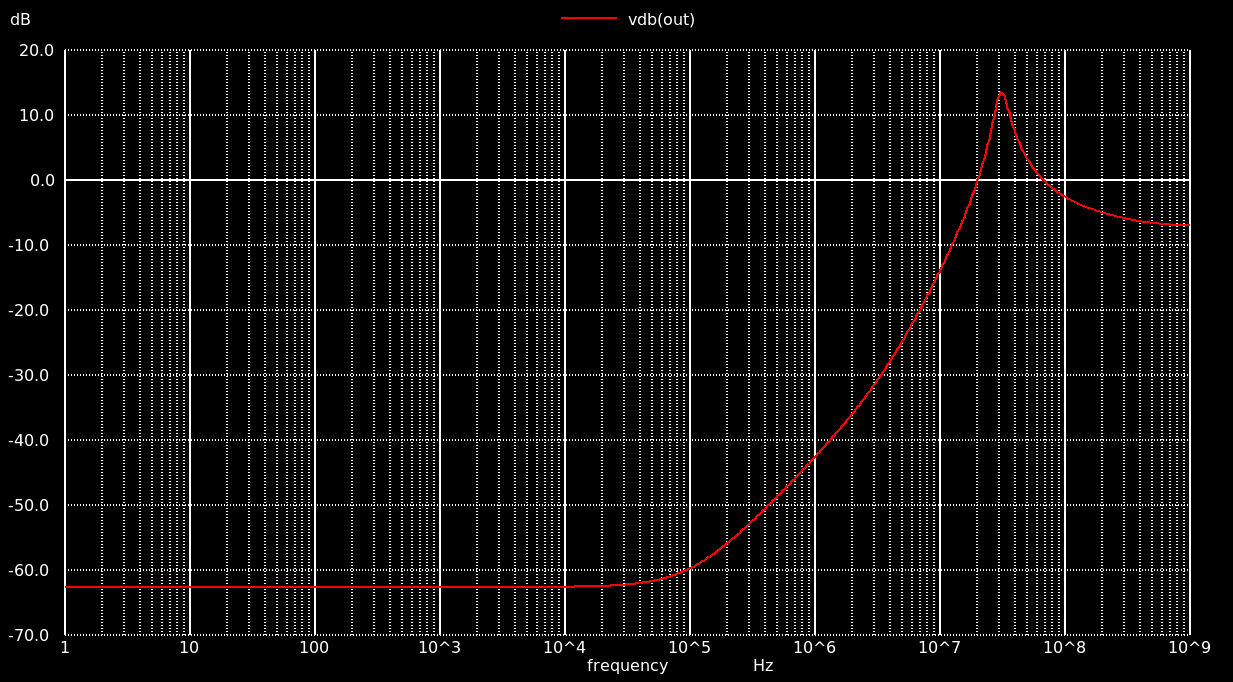 |
| VSweep |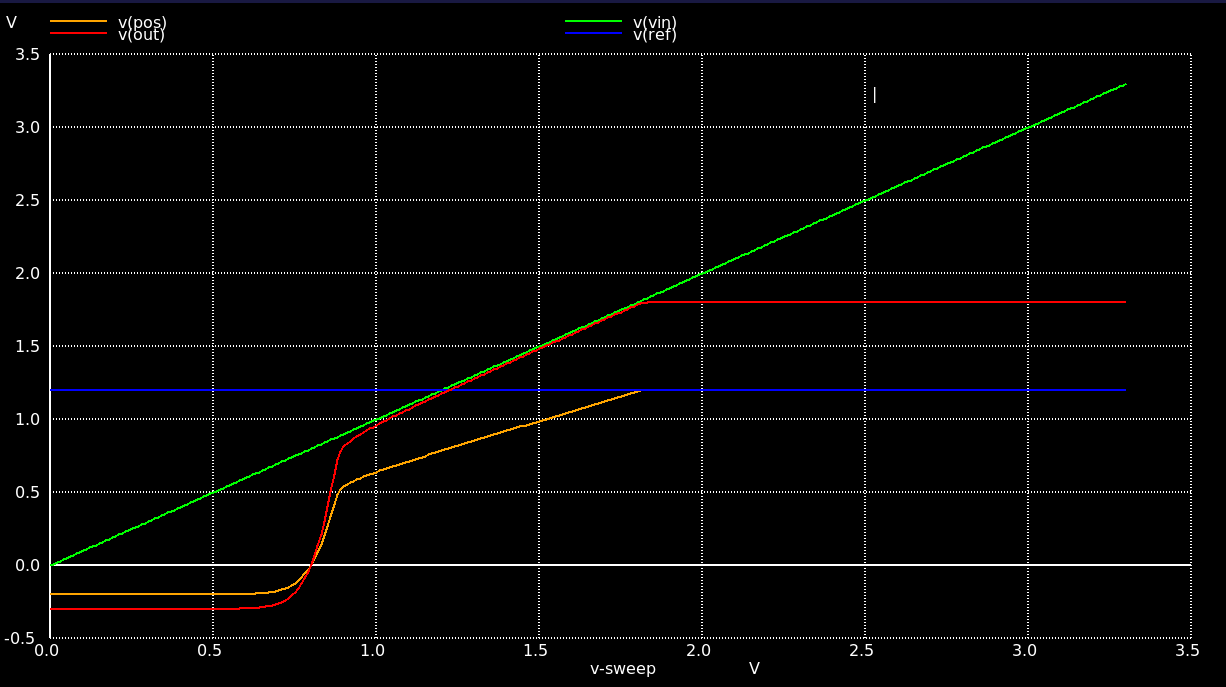 |

### Transient Analysis

In [15]:
data = {}

ldo_schematic = handlers.project_dir / "ldo_gf180.spice"
ns.source(ldo_schematic)
ns.destroy()

ns.cmd("save all")
handlers.ns_log(False)
ns.cmd("tran 1ns 24us")
handlers.ns_log(False)
print(ns.vector_names())
#plt.plot(ns.vector("@il[current]"))

data["time"]      = ns.vector("time")
data["vout"]      = ns.vector("v(out)")
data["vref"]      = ns.vector("v(ref)")
data["vpos"]      = ns.vector("v(pos)")
data["vin"]       = ns.vector("v(vin)")
data["v(op_out)"] = ns.vector("v(op_out)")
data["i(vin)"]     = ns.vector("i(vin)")

handlers.numpy_store_data(data, "ldo-transient.npz")

AttributeError: 'function' object has no attribute 'source'

#### Comments and Plots

dict_keys(['time', 'vout', 'vref', 'vpos', 'vin', 'v(op_out)', 'i(vin)'])


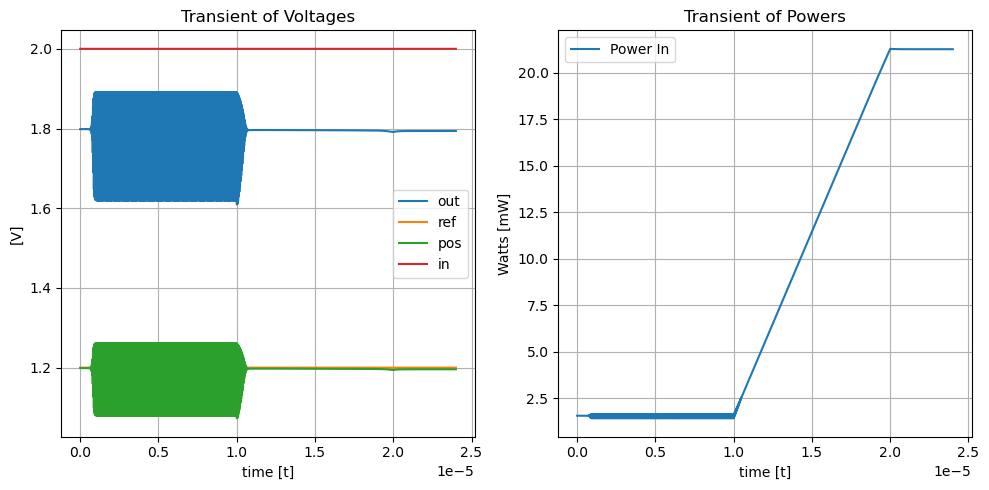

In [17]:
data = handlers.numpy_get_data("ldo-transient.npz")

voltages = {
    "time": data["time"],
    "out":  data['vout'],
    "ref":  data['vref'],
    "pos":  data['vpos'],
    "in":   data['vin']
}

powers = {
    "time": data["time"],
    "Power In":  np.abs(1000 * data['vin'] * data['i(vin)'])
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

handlers.plt_add_transient(ax1, voltages,    title="Transient of Voltages", ylabel="[V]")
handlers.plt_add_transient(ax2, powers,      title="Transient of Powers", ylabel="Watts [mW]")
fig.tight_layout()
fig.savefig(handlers.img_dir / "transient.png")

### Supply Sweep

In [3]:
data = {}

ldo_schematic = handlers.project_dir / "test-ldo.spice"
ns.destroy()
ns.source(ldo_schematic)

ns.cmd("save all")
handlers.ns_log(True)
ns.cmd("dc vin 0 3.3 0.01")
handlers.ns_log(False)
print(ns.vector_names())

data["vout"]      = ns.vector("v(out)")
data["vref"]      = ns.vector("v(ref)")
data["vpos"]      = ns.vector("v(pos)")
data["vin"]       = ns.vector("v(vin)")
data["v(op_out)"] = ns.vector("v(op_out)")
data["i(vin)"]    = ns.vector("i(vin)")
data["v-sweep"]   = ns.vector("v-sweep")

handlers.numpy_store_data(data, "ldo-sweep.npz")

ERROR:ngspyce.sharedspice:Warning: m=xx on .subckt line will override multiplier m hierarchy!
DEBUG:ngspyce.sharedspice:--ready--
DEBUG:ngspyce.ngspyce:Command dc vin 0 3.3 0.01 returned ['Doing analysis at TEMP = 27.000000 and TNOM = 27.000000', 'Reference value :  0.00000e+00\r', 'No. of Data Rows : 331']


['@r10[i]', '@il2[current]', '@cl[i]', '@m.xm0.m0[ib]', '@m.xm0.m0[ig]', '@m.xm0.m0[is]', '@m.xm0.m0[id]', '@m.x1.xm6.m0[ib]', '@m.x1.xm6.m0[ig]', '@m.x1.xm6.m0[is]', '@m.x1.xm6.m0[id]', '@m.x1.xm5.m0[ib]', '@m.x1.xm5.m0[ig]', '@m.x1.xm5.m0[is]', '@m.x1.xm5.m0[id]', '@m.x1.xm8.m0[ib]', '@m.x1.xm8.m0[ig]', '@m.x1.xm8.m0[is]', '@m.x1.xm8.m0[id]', '@m.x1.xm7.m0[ib]', '@m.x1.xm7.m0[ig]', '@m.x1.xm7.m0[is]', '@m.x1.xm7.m0[id]', '@m.x1.xm4.m0[ib]', '@m.x1.xm4.m0[ig]', '@m.x1.xm4.m0[is]', '@m.x1.xm4.m0[id]', '@m.x1.xm2.m0[ib]', '@m.x1.xm2.m0[ig]', '@m.x1.xm2.m0[is]', '@m.x1.xm2.m0[id]', '@m.x1.xm3.m0[ib]', '@m.x1.xm3.m0[ig]', '@m.x1.xm3.m0[is]', '@m.x1.xm3.m0[id]', '@m.x1.xm1.m0[ib]', '@m.x1.xm1.m0[ig]', '@m.x1.xm1.m0[is]', '@m.x1.xm1.m0[id]', '@c.x1.xc2.c_cap[i]', '@r6[i]', '@r1[i]', '@i1[current]', 'v1#branch', 'vin#branch', 'x1.net3', 'x1.net1', 'op_out', 'x1.net2', 'vin', 'pos', 'out', 'ref', 'net1', 'v-sweep']
Data stored in file .data/ldo-sweep.npz


#### Comments and Plots of Supply Sweep Analysis

dict_keys(['vout', 'vref', 'vpos', 'vin', 'v(op_out)', 'i(vin)', 'v-sweep'])


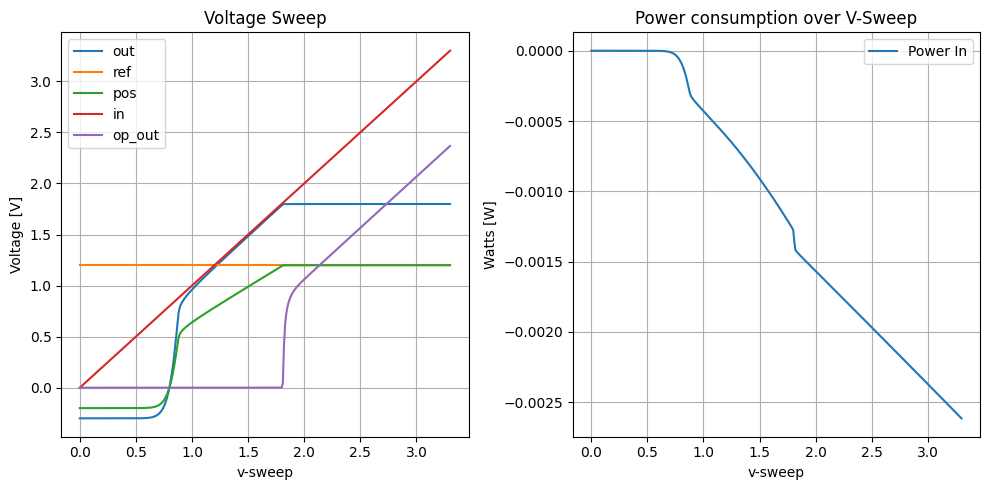

In [4]:
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline

data = handlers.numpy_get_data("ldo-sweep.npz")

voltages = {
    "v-sweep": data['v-sweep'],
    "out":     data['vout'],
    "ref":     data['vref'],
    "pos":     data['vpos'],
    "in":      data['vin'],
    "op_out":  data['v(op_out)']
}

power = {
    "v-sweep": data['v-sweep'],
    "Power In": data['vin'] * data['i(vin)']
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
handlers.plt_add_vsweep(ax1, voltages, title="Voltage Sweep", ylabel="Voltage [V]")
handlers.plt_add_vsweep(ax2, power, title="Power consumption over V-Sweep", ylabel="Watts [W]")
fig.tight_layout()
fig.savefig(handlers.img_dir / "v-sweep.png")

### PSRR Analysis

In [22]:
data = {}

ldo_schematic = handlers.project_dir / "test-ldo.spice"
ns.source(ldo_schematic)

ns.cmd("save all")
ns.cmd("alter vin AC=1")
handlers.ns_log(True)
ns.ac("dec", 100, 1, 1e6)
handlers.ns_log(False)
print(ns.vector_names())

data["freq"]      = ns.vector("frequency")
data["v(out)"]    = ns.vector("v(out)")
data["gm"]        = ns.vector(handlers.ns_gf_retrieve("m0", "gm"))
data["v(op_out)"] = ns.vector("v(op_out)")

handlers.numpy_store_data(data, "ldo-psrr.npz")

ERROR:ngspyce.sharedspice:Note: Starting dynamic gmin stepping
ERROR:ngspyce.sharedspice:Trying gmin =   1.0000E-03 Note: One successful gmin step
ERROR:ngspyce.sharedspice:Trying gmin =   1.0000E-04 Note: One successful gmin step
ERROR:ngspyce.sharedspice:Trying gmin =   1.0000E-05 Warning: Further gmin increment
ERROR:ngspyce.sharedspice:Trying gmin =   5.6234E-05 Note: One successful gmin step
ERROR:ngspyce.sharedspice:Trying gmin =   2.3714E-05 Note: One successful gmin step
ERROR:ngspyce.sharedspice:Trying gmin =   6.4938E-06 Warning: Further gmin increment
ERROR:ngspyce.sharedspice:Trying gmin =   1.7154E-05 Warning: Further gmin increment
ERROR:ngspyce.sharedspice:Trying gmin =   2.1870E-05 Note: One successful gmin step
ERROR:ngspyce.sharedspice:Trying gmin =   1.9369E-05 Warning: Further gmin increment
ERROR:ngspyce.sharedspice:Trying gmin =   2.1216E-05 Note: One successful gmin step
ERROR:ngspyce.sharedspice:Trying gmin =   2.0271E-05 Note: One successful gmin step
ERROR:ngs

['@r10[i]', '@il2[current]', '@cl[i]', '@m.xm0.m0[ib]', '@m.xm0.m0[ig]', '@m.xm0.m0[is]', '@m.xm0.m0[id]', '@m.x1.xm6.m0[ib]', '@m.x1.xm6.m0[ig]', '@m.x1.xm6.m0[is]', '@m.x1.xm6.m0[id]', '@m.x1.xm5.m0[ib]', '@m.x1.xm5.m0[ig]', '@m.x1.xm5.m0[is]', '@m.x1.xm5.m0[id]', '@m.x1.xm8.m0[ib]', '@m.x1.xm8.m0[ig]', '@m.x1.xm8.m0[is]', '@m.x1.xm8.m0[id]', '@m.x1.xm7.m0[ib]', '@m.x1.xm7.m0[ig]', '@m.x1.xm7.m0[is]', '@m.x1.xm7.m0[id]', '@m.x1.xm4.m0[ib]', '@m.x1.xm4.m0[ig]', '@m.x1.xm4.m0[is]', '@m.x1.xm4.m0[id]', '@m.x1.xm2.m0[ib]', '@m.x1.xm2.m0[ig]', '@m.x1.xm2.m0[is]', '@m.x1.xm2.m0[id]', '@m.x1.xm3.m0[ib]', '@m.x1.xm3.m0[ig]', '@m.x1.xm3.m0[is]', '@m.x1.xm3.m0[id]', '@m.x1.xm1.m0[ib]', '@m.x1.xm1.m0[ig]', '@m.x1.xm1.m0[is]', '@m.x1.xm1.m0[id]', '@c.x1.xc2.c_cap[i]', '@r6[i]', '@r1[i]', '@i1[current]', 'v1#branch', 'vin#branch', 'x1.net3', 'x1.net1', 'op_out', 'x1.net2', 'vin', 'pos', 'out', 'ref', 'net1', 'frequency']
Data stored in file .data/ldo-psrr.npz


dict_keys(['freq', 'v(out)', 'gm', 'v(op_out)'])


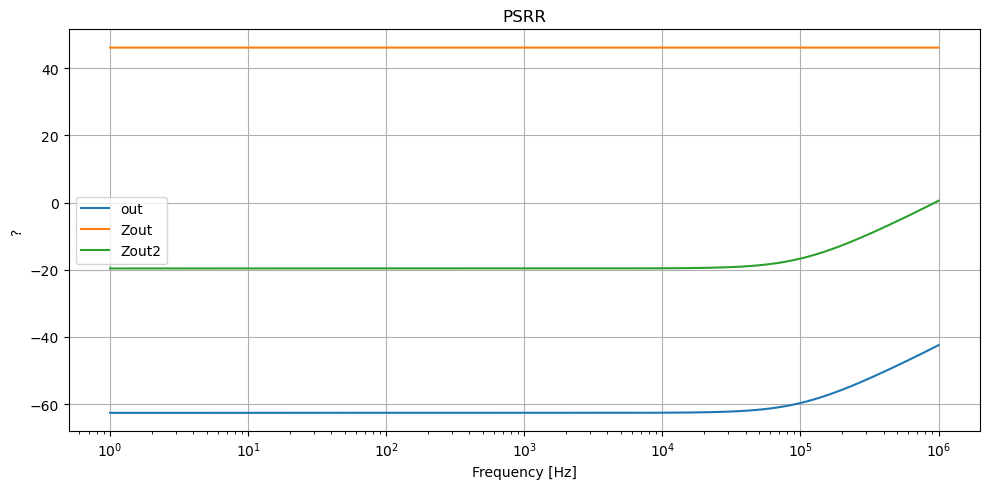

In [8]:
data = handlers.numpy_get_data("ldo-psrr.npz")

psrr = {
    "freq":  data["freq"],
    "out":   data["v(out)"],
    "Zout":  1.5 / ( data["gm"] * data["v(op_out)"] ),
    "Zout2": data["v(out)"] / data["gm"]
}

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 5))
handlers.plt_add_psrr(ax1, psrr, title="PSRR", ylabel="?")
fig.tight_layout()
fig.savefig(handlers.img_dir / "psrr.png")

### Stability Analysis

In [10]:
data = {}

ldo_schematic = handlers.project_dir / "test-ldo.spice"
ns.source(ldo_schematic)

ns.cmd("save frequency v(out)")
handlers.ns_log(True)
ns.cmd("alter vin AC=1")
handlers.ns_log(False)
ns.ac("dec", 100, 1, 1e12)
print(ns.vector_names())

data["freq"] = np.abs(ns.vector('frequency'))
data["vout"] = ns.vector('v(out)')

handlers.numpy_store_data(data, "ldo-stability.npz")

DEBUG:ngspyce.ngspyce:Command alter vin AC=1 returned []


['@r10[i]', '@il2[current]', '@cl[i]', '@m.xm0.m0[ib]', '@m.xm0.m0[ig]', '@m.xm0.m0[is]', '@m.xm0.m0[id]', '@m.x1.xm6.m0[ib]', '@m.x1.xm6.m0[ig]', '@m.x1.xm6.m0[is]', '@m.x1.xm6.m0[id]', '@m.x1.xm5.m0[ib]', '@m.x1.xm5.m0[ig]', '@m.x1.xm5.m0[is]', '@m.x1.xm5.m0[id]', '@m.x1.xm8.m0[ib]', '@m.x1.xm8.m0[ig]', '@m.x1.xm8.m0[is]', '@m.x1.xm8.m0[id]', '@m.x1.xm7.m0[ib]', '@m.x1.xm7.m0[ig]', '@m.x1.xm7.m0[is]', '@m.x1.xm7.m0[id]', '@m.x1.xm4.m0[ib]', '@m.x1.xm4.m0[ig]', '@m.x1.xm4.m0[is]', '@m.x1.xm4.m0[id]', '@m.x1.xm2.m0[ib]', '@m.x1.xm2.m0[ig]', '@m.x1.xm2.m0[is]', '@m.x1.xm2.m0[id]', '@m.x1.xm3.m0[ib]', '@m.x1.xm3.m0[ig]', '@m.x1.xm3.m0[is]', '@m.x1.xm3.m0[id]', '@m.x1.xm1.m0[ib]', '@m.x1.xm1.m0[ig]', '@m.x1.xm1.m0[is]', '@m.x1.xm1.m0[id]', '@c.x1.xc2.c_cap[i]', '@r6[i]', '@r1[i]', '@i1[current]', 'v1#branch', 'vin#branch', 'x1.net3', 'x1.net1', 'op_out', 'x1.net2', 'vin', 'pos', 'out', 'ref', 'net1', 'frequency']


Análisis de estabilidad de LDO para distintos valores de DC

In [12]:
data = {}

ldo_schematic = handlers.project_dir / "test-ldo.spice"
ns.source(ldo_schematic)

for dc in [0]:
    ns.cmd("save frequency v(out)")
    handlers.ns_log(True)
    ns.cmd(f"alter vin AC=1")
    #ns.cmd("reset")

    handlers.ns_log(False)
    ns.ac("dec", 100, 1, 1*1e8)
    handlers.ns_log(False)
    print(ns.vector_names())
    
    data[f"dc={dc}"] = ns.vector('v(out)')

data[f"freq"] = np.abs(ns.vector('frequency'))

handlers.numpy_store_data(data, "ldo-stability.npz")

DEBUG:ngspyce.ngspyce:Command alter vin AC=1 returned []


['@r10[i]', '@il2[current]', '@cl[i]', '@m.xm0.m0[ib]', '@m.xm0.m0[ig]', '@m.xm0.m0[is]', '@m.xm0.m0[id]', '@m.x1.xm6.m0[ib]', '@m.x1.xm6.m0[ig]', '@m.x1.xm6.m0[is]', '@m.x1.xm6.m0[id]', '@m.x1.xm5.m0[ib]', '@m.x1.xm5.m0[ig]', '@m.x1.xm5.m0[is]', '@m.x1.xm5.m0[id]', '@m.x1.xm8.m0[ib]', '@m.x1.xm8.m0[ig]', '@m.x1.xm8.m0[is]', '@m.x1.xm8.m0[id]', '@m.x1.xm7.m0[ib]', '@m.x1.xm7.m0[ig]', '@m.x1.xm7.m0[is]', '@m.x1.xm7.m0[id]', '@m.x1.xm4.m0[ib]', '@m.x1.xm4.m0[ig]', '@m.x1.xm4.m0[is]', '@m.x1.xm4.m0[id]', '@m.x1.xm2.m0[ib]', '@m.x1.xm2.m0[ig]', '@m.x1.xm2.m0[is]', '@m.x1.xm2.m0[id]', '@m.x1.xm3.m0[ib]', '@m.x1.xm3.m0[ig]', '@m.x1.xm3.m0[is]', '@m.x1.xm3.m0[id]', '@m.x1.xm1.m0[ib]', '@m.x1.xm1.m0[ig]', '@m.x1.xm1.m0[is]', '@m.x1.xm1.m0[id]', '@c.x1.xc2.c_cap[i]', '@r6[i]', '@r1[i]', '@i1[current]', 'v1#branch', 'vin#branch', 'x1.net3', 'x1.net1', 'op_out', 'x1.net2', 'vin', 'pos', 'out', 'ref', 'net1', 'frequency']
Data stored in file .data/ota/ldo-stability.npz


dict_keys(['dc=0', 'freq'])


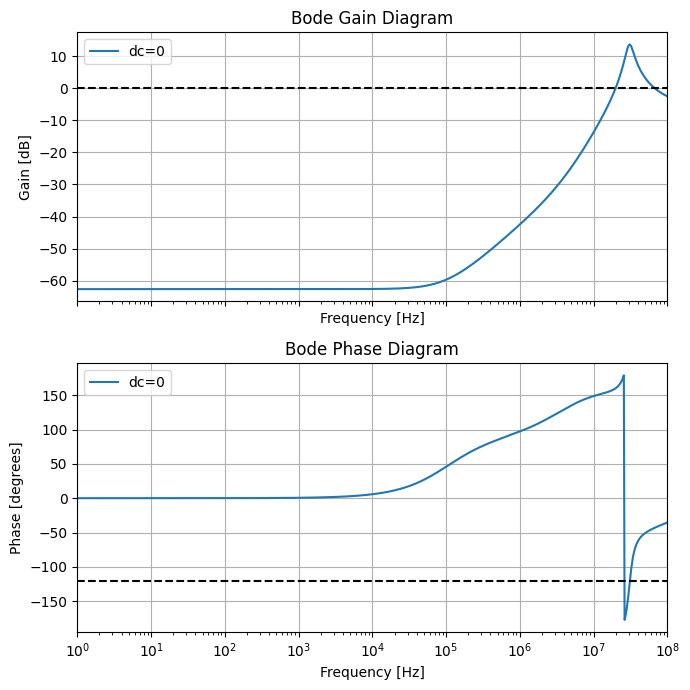

In [13]:
data = handlers.numpy_get_data("ldo-stability.npz")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 7), sharex=True)
handlers.plt_add_bode(ax1, ax2, data)
fig.tight_layout()

# Ignorar

Item A

Utilizando el archivo de simulación `nmmos_intrinsic_gain`, genere la **curva de ganancia intrínseca versus $V_{DS}$** para distintos largos de canal.

In [8]:
data = {}

nmos_schematic = project_dir / "nmos_intrinsic_gain_IPD413HW1.spice"
ns.source(nmos_schematic)

for l in (.15, .225, .25, .275, .3, .375, .45 , .525, .75, 1.05):
    ns.destroy()
    ns.cmd(f"alterparam l = {l}")
    ns.cmd("reset")

    print("Analysing nmos with l =", ns.device_state("m.xm1.msky130_fd_pr__nfet_01v8")["l"], "m")

    ns.cmd("save all")
    ns.cmd(save_cmd("m1", "gm"))
    ns.cmd(save_cmd("m1", "gds"))

    ns.dc("vds", 0.07, 1.8, 0.01)

    ns.cmd("let curve=abs(1/deriv(v(g1)))")
    #data[f"L ={l: .3} $\mu$m"] = ns.vector("curve").copy()

    data[f"l={l: .3}"] = ns.vector(sky_retrieve("m1", "gm")) / ns.vector(sky_retrieve("m1", "gds"))

data["v-sweep"] = ns.vector("v-sweep")

np.savez("p3_a.npz", **data)


ERROR:ngspyce.sharedspice:Command 'source' failed:
ERROR:ngspyce.sharedspice:/headless/.xschem/simulations/nmos_intrinsic_gain_IPD413HW1.spice: Resource temporarily unavailable
ERROR:ngspyce.sharedspice:Simulation interrupted due to error!
ERROR:ngspyce.sharedspice:Error: ngspice.dll cannot recover and awaits to be detached
Exception ignored on converting result of ctypes callback function: <function controlled_exit at 0x7efd88378820>
Traceback (most recent call last):
  File "/foss/tools/ngspyce/154a272/local/lib/python3.10/dist-packages/ngspyce/ngspyce.py", line 79, in cmd
    spice.ngSpice_Command(command.encode('ascii'))
TypeError: 'NoneType' object cannot be interpreted as an integer
ERROR:ngspyce.sharedspice:Error: parameter 'l' not found,
ERROR:ngspyce.sharedspice:command 'alterparam' skipped


KeyError: 'l'

dict_keys(['l= 0.15', 'l= 0.225', 'l= 0.25', 'l= 0.275', 'l= 0.3', 'l= 0.375', 'l= 0.45', 'l= 0.525', 'l= 0.75', 'l= 1.05', 'v-sweep'])


/tmp/ipykernel_496/997284352.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_496/997284352.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


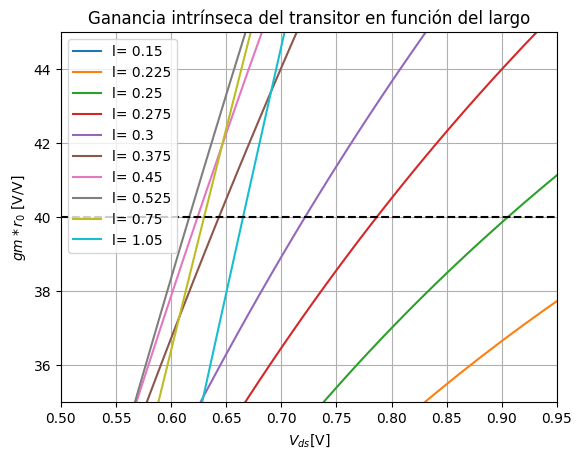

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

_ = np.load("p3_a.npz")
data = {key: _[key] for key in _}
pprint(data.keys())

sweep = data["v-sweep"].copy()
del data["v-sweep"]

fig, ax1 = plt.subplots()

for key, value in data.items():
    ax1.plot(sweep, value, label=key)

ax1.axhline(40, color="black", linestyle="dashed")

ax1.set_title("Ganancia intrínseca del transitor en función del largo")
ax1.set_xlabel("$V_{ds}$[V]")
ax1.set_ylabel("$gm * r_0$ [V/V]")
ax1.grid()
ax1.legend()

fig.show()
fig.savefig("p3-a-1.png")

ax1.set_xlim(.5, .95)
ax1.set_ylim(35, 45)

fig.show()
fig.savefig("p3-a-2.png")

Item D

Utilice el archivo `cs_amp_full.sch` para verificar la performance del circuito diseñado. Grafique diagrama de Bode en amplitud y fase e interprete los datos.

In [5]:
data = {}

# Analysis
cs_amplifier_schematic = project_dir / "cs_amp_full_IPD413HW1-v2.spice"
ns.source(cs_amplifier_schematic)

ns.ac("dec", 100, 1, 1e12)

data["freq"] = np.abs(ns.vector('frequency'))
data["vout"] = ns.vector('vout')

np.savez("p3_d.npz", **data)

ERROR:ngspyce.sharedspice:Warning: m=xx on .subckt line will override multiplier m hierarchy!
ERROR:ngspyce.sharedspice:Can't open viewport for graphics.
ERROR:ngspyce.sharedspice:Can't open viewport for graphics.


dict_keys(['freq', 'vout'])


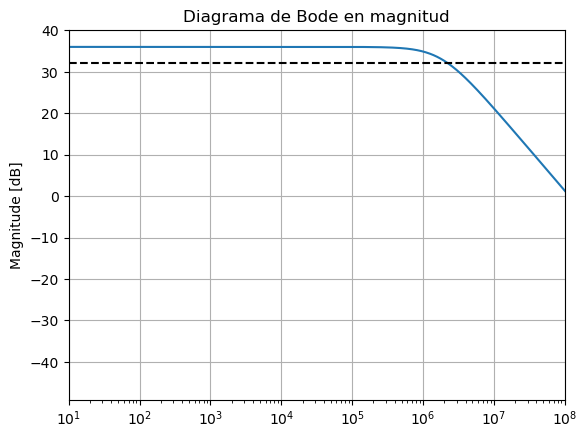

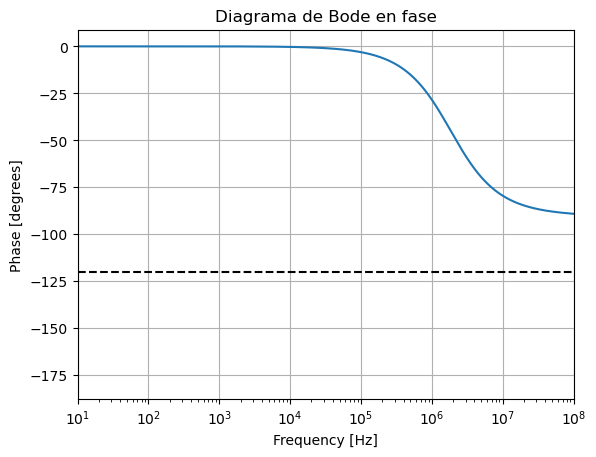

In [25]:
_ = np.load("p3_d.npz")
data = {key: _[key] for key in _}
pprint(data.keys())

freq = data["freq"]
vout = data["vout"]


# Magnitude Diagram
###################
fig, ax1 = plt.subplots()
ax1.set_title("Diagrama de Bode en magnitud")
ax1.grid()
ax1.set_xlim(10**1, 10**8)
ax1.semilogx(freq, 20*np.log10(np.abs(vout)))
ax1.axhline(20*np.log10(40), color="black", linestyle="dashed")
ax1.set_ylabel('Magnitude [dB]')
fig.savefig("p3-d-1.png")


# Phase Diagram
###############
fig, ax2 = plt.subplots()
ax2.set_title("Diagrama de Bode en fase")
ax2.grid()
ax2.set_xlim(10**1, 10**8)
ax2.semilogx(freq, np.angle(vout, True))
ax2.axhline(-180+60, color="black", linestyle="dashed")
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Phase [degrees]')
ax2.margins(x=0)
fig.savefig("p3-d-2.png")